In [11]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting.csv')

In [125]:
df


,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
1,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
2,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,[S1]SrTi
3,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,[S1]SrTiAl
4,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,[S1]SrTiAl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,[S151]LaCo
536,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,[S151]LaCo
537,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,[S151]LaCo
538,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,[S151]LaCo


In [110]:
######  特徴量を持つ行を指定
###### A siteごとにDataFrameを作る
###### 標準化する
######  parallelcoordinate


######  特徴量を持つ行を指定
feature_lis = ["A mole", "A1 mole", "A2 mole", "B mole", "B1 mole", "B2 mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Label","Crystal"]
df1 = df.loc[:,feature_lis].fillna(value = 0)

###### 標準化する
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1.loc[:, :"ProdRate(μmol/gh)"] = sc.fit_transform(df1.loc[:, :"ProdRate(μmol/gh)"])
#ax = pd.plotting.parallel_coordinates(df1,'Label')#, color=('#DE3163'))

df1


,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label,Crystal
0,1.078297,-0.344285,-0.210884,-0.813212,-0.350907,-0.106,0.142070,-0.099471,-0.173172,-0.376769,-0.170047,-0.71246,-0.172349,-0.363455,-0.199632,[S1]SrTi,cubic
1,1.078297,-0.344285,-0.210884,-0.813212,-0.350907,-0.106,0.142070,-0.099471,-0.173172,-0.363417,-0.170047,-0.71246,-0.172349,-0.363455,-0.199632,[S1]SrTi,cubic
2,1.078297,-0.344285,-0.210884,-0.813212,-0.350907,-0.106,0.142070,-0.099471,-0.173172,-0.343389,-0.170047,-0.71246,-0.172349,-0.363455,-0.339193,[S1]SrTi,cubic
3,1.072911,-0.344285,-0.210884,-0.813212,-0.350002,-0.106,0.142070,-0.099471,-0.173172,-0.376769,-0.170047,-0.71246,-0.172349,-0.363455,-0.336995,[S1]SrTiAl,cubic
4,1.072911,-0.344285,-0.210884,-0.818237,-0.341860,-0.106,0.136455,-0.099471,-0.173172,-0.316686,-0.170047,-0.71246,-0.172349,-0.363455,-0.243588,[S1]SrTiAl,cubic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.344036,[S151]LaCo,rhombohedral
536,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.341734,[S151]LaCo,rhombohedral
537,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.338772,[S151]LaCo,rhombohedral
538,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.340088,[S151]LaCo,rhombohedral


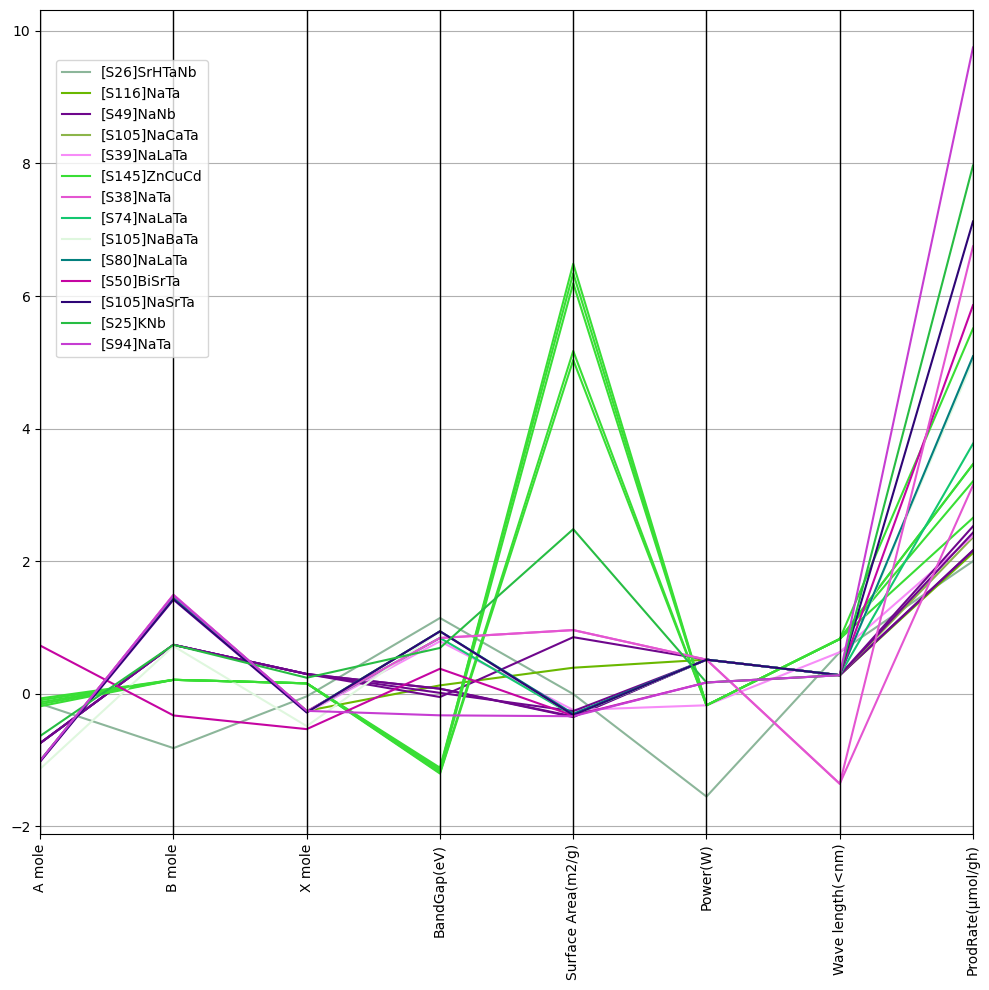

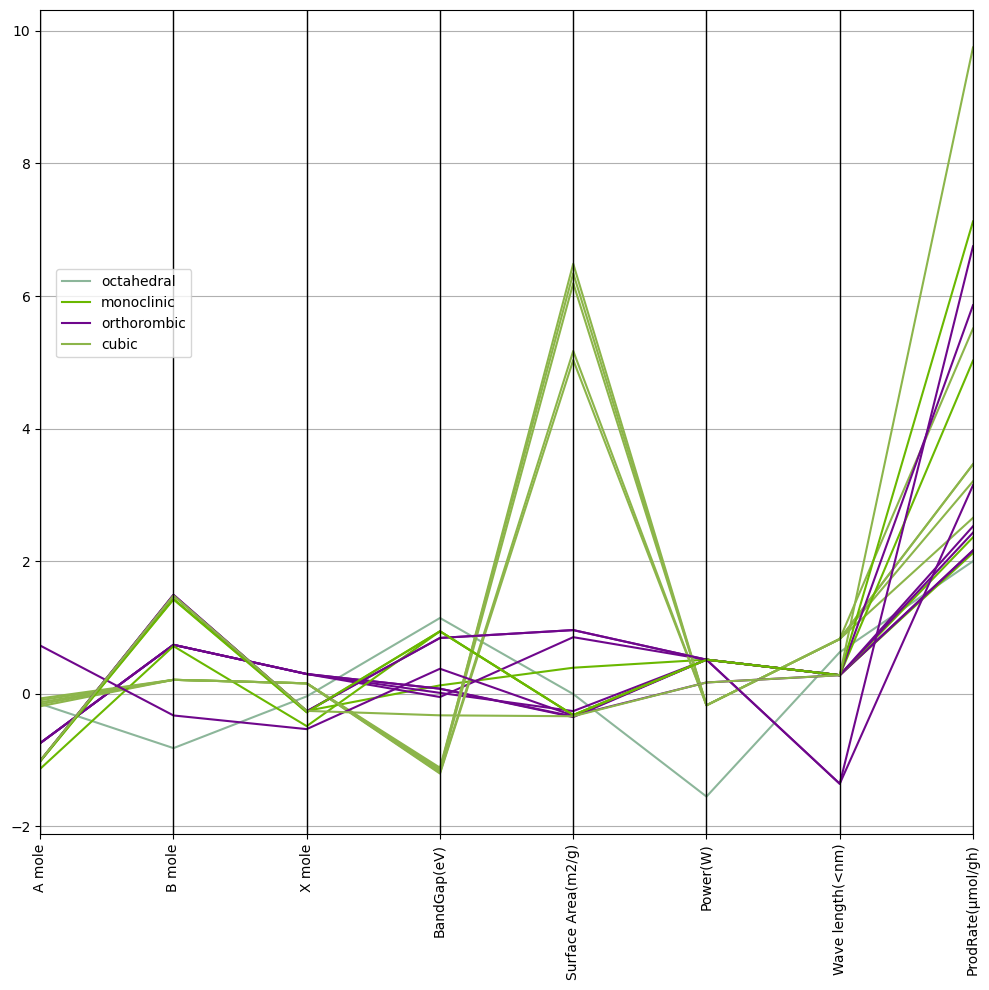

In [114]:
###### Prodrateで分類してみる
df1 = df1_new[df1_new['ProdRate(μmol/gh)'] > 2]
df2 = df1.loc[:,["A mole",  "B mole",  "X mole",
              "BandGap(eV)", "Surface Area(m2/g)", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)", "Label"]] 
fig, ax = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
ax = pd.plotting.parallel_coordinates(df2[df2["Label"] != 0],"Label")#, color=('#DE3163'))
ax.tick_params(axis = "x", rotation = 90)
ax.legend(loc = 'lower left',
         bbox_to_anchor = (0.01,0.57,0.1,0.4))

df3 = df1.loc[:,["A mole",  "B mole",  "X mole",
              "BandGap(eV)", "Surface Area(m2/g)", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)", "Crystal"]] 
fig, ax2 = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
ax2 = pd.plotting.parallel_coordinates(df3[df3["Crystal"] != 0],"Crystal")#, color=('#DE3163'))
ax2.tick_params(axis = "x", rotation = 90)
ax2.legend(loc = 'lower left',
         bbox_to_anchor = (0.01,0.57,0.1,0.4))

{'Y', 'Sr', 'In', 'K', 'Bi', 'Ni', 'Mn', 'Zn', 'Na', 'Sm', 'Ca', 'Cr', 'Sb', 'Cu', 'Ag', 'Ba', 'Ga', 'Co', 'Li', 'La'}


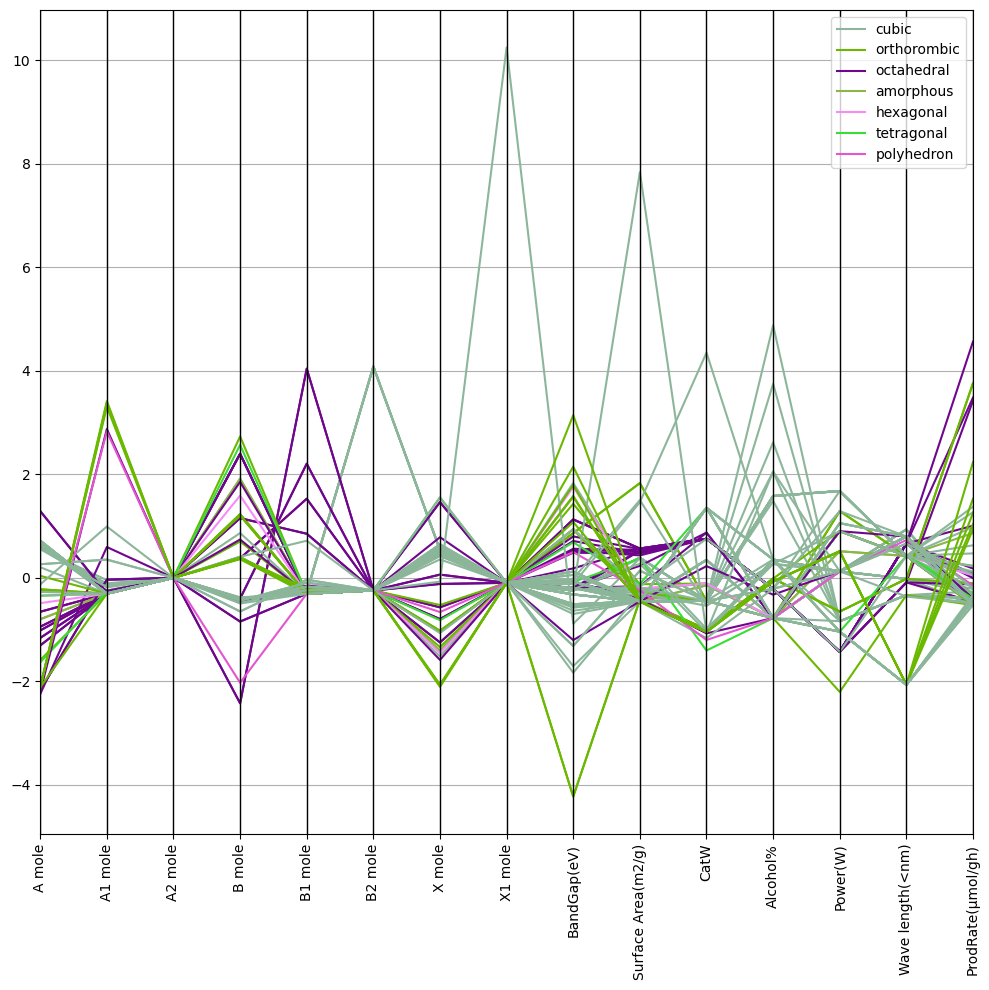

In [60]:
###### A siteごとにDataFrameを作る

print(set(list(df["A"])))
df2 = df[df["A"] == "Sr"].loc[:,feature_lis].fillna(value = 0)
sc = StandardScaler()
df2.loc[:, :"ProdRate(μmol/gh)"] = sc.fit_transform(df2.loc[:, :"ProdRate(μmol/gh)"])
fig, ax = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)

df3 = df2[["A mole", "A1 mole", "A2 mole", "B mole", "B1 mole", "B2 mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Crystal"]]
ax = pd.plotting.parallel_coordinates(df3[df3["Crystal"] != 0],"Crystal")#, color=('#DE3163'))
ax.tick_params(axis = "x", rotation = 90)

In [56]:
df2.loc[:, :"ProdRate(μmol/gh)"]

,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh)
0,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.381345,-0.446450,-0.779168,0.123642,-0.021696,-0.212706
1,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.347574,-0.446450,-0.779168,0.123642,-0.021696,-0.212706
2,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.296918,-0.446450,-0.779168,0.123642,-0.021696,-0.515658
3,0.695401,-0.306752,0.0,-0.395296,-0.308142,-0.244949,0.603080,-0.09759,-0.196447,-0.381345,-0.446450,-0.779168,0.123642,-0.021696,-0.510887
4,0.695401,-0.306752,0.0,-0.403072,-0.299444,-0.244949,0.580491,-0.09759,-0.196447,-0.229376,-0.446450,-0.779168,0.123642,-0.021696,-0.308124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,0.055515,-0.457330,1.351974,-0.779168,-1.040997,-2.069013,-0.445287
531,0.673706,-0.306752,0.0,-0.410847,-0.241453,-0.244949,0.557903,-0.09759,0.118505,-0.457330,1.351974,0.352591,-1.040997,-2.069013,-0.510887
532,0.673706,-0.306752,0.0,-0.410847,-0.241453,-0.244949,0.557903,-0.09759,0.118505,-0.457330,1.351974,-0.779168,-1.040997,-2.069013,-0.409506
533,0.623084,-0.306752,0.0,-0.441948,-0.096477,-0.244949,0.467547,-0.09759,0.118505,-0.457330,1.351974,0.352591,-1.040997,-2.069013,-0.370742


In [30]:
feature_lis = ["A mole", "A1 mole", "A2 mole", "B mole", "B1 mole", "B2 mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Label"]
df1 = df.loc[:,feature_lis].fillna(value = 0)
df1

,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,0.478,0.0,0.0,0.261,0.0000,0.0,0.262,0.0,3.20,0.9,1.0,0.0,300.0,300.0,540.00,[S1]SrTi
1,0.478,0.0,0.0,0.261,0.0000,0.0,0.262,0.0,3.20,1.3,1.0,0.0,300.0,300.0,540.00,[S1]SrTi
2,0.478,0.0,0.0,0.261,0.0000,0.0,0.262,0.0,3.20,1.9,1.0,0.0,300.0,300.0,32.00,[S1]SrTi
3,0.477,0.0,0.0,0.261,0.0001,0.0,0.262,0.0,3.20,0.9,1.0,0.0,300.0,300.0,40.00,[S1]SrTiAl
4,0.477,0.0,0.0,0.260,0.0010,0.0,0.261,0.0,3.20,2.7,1.0,0.0,300.0,300.0,380.00,[S1]SrTiAl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.565,0.0,0.0,0.240,0.0000,0.0,0.195,0.0,1.42,0.0,1.0,0.0,500.0,0.0,14.37,[S151]LaCo
536,0.565,0.0,0.0,0.240,0.0000,0.0,0.195,0.0,1.42,0.0,1.0,0.0,500.0,0.0,22.75,[S151]LaCo
537,0.565,0.0,0.0,0.240,0.0000,0.0,0.195,0.0,1.42,0.0,1.0,0.0,500.0,0.0,33.53,[S151]LaCo
538,0.565,0.0,0.0,0.240,0.0000,0.0,0.195,0.0,1.42,0.0,1.0,0.0,500.0,0.0,28.74,[S151]LaCo


In [64]:
df.drop_duplicates(subset = "Label")

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.10,cubic,3.20,0.9,1.00,0.0,NaN,NaN,Xe,300.0,300.0,540.00,[S1]SrTi
3,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.10,cubic,3.20,0.9,1.00,0.0,NaN,NaN,Xe,300.0,300.0,40.00,[S1]SrTiAl
6,[S2],Mn,non,non,Co,non,non,O,NaN,0.232,NaN,NaN,0.498,NaN,NaN,0.270,NaN,novel,743.0,12.0,NaN,NaN,NaN,octahedral,2.10,NaN,4.00,0.0,NaN,NaN,visible,64.0,420.0,91.07,[S2]MnCo
8,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.475,0.004,NaN,0.260,0.0010,NaN,0.260,NaN,HT,NaN,NaN,PD,Pt,0.50,cubic,2.95,NaN,0.50,20.0,NaN,NaN,Xe,300.0,420.0,66.00,[S3]SrLaTiCr
14,[S4],Sr,non,non,Ti,Rh,Sb,O,NaN,0.473,NaN,NaN,0.258,0.0030,0.007,0.259,NaN,SSR,1373.0,10.0,impreg,IrO2,3.00,cubic,2.95,NaN,1.66,0.0,H2SO4,NaN,Xe,300.0,440.0,22.00,[S4]SrTiRhSb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,[S149],La,Sr,non,Fe,non,non,O,NaN,0.502,0.056,NaN,0.237,NaN,NaN,0.204,NaN,novel,1273.0,10.0,PD,Pt,0.50,orthorombic,1.50,NaN,1.00,10.0,NaN,NaN,Xe,300.0,420.0,33.33,[S149]LaSrFe
520,[S149],La,Sr,non,Fe,Ti,non,O,NaN,0.521,0.042,NaN,0.227,0.0080,NaN,0.203,NaN,flux,1273.0,10.0,PD,Pt,0.50,orthorombic,1.50,NaN,1.00,10.0,NaN,NaN,Xe,300.0,420.0,53.33,[S149]LaSrFeTi
523,[S150],Sr,non,non,Ti,Al,non,O,NaN,0.471,NaN,NaN,0.257,0.0140,NaN,0.258,NaN,flux,1273.0,10.0,NaN,Au,0.10,cubic,3.30,NaN,2.50,20.0,NaN,NaN,Xe,150.0,NaN,200.00,[S150]SrTiAl
529,[S150],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,SSR,1273.0,10.0,NaN,Au,0.25,cubic,3.40,NaN,2.50,20.0,NaN,NaN,Xe,150.0,NaN,10.00,[S150]SrTi


In [69]:
df1 = df.iloc[:,1:9].fillna(value = 'non')
df["Label"] = df.iloc[:,1:8].fillna(value = 'non').sum(axis = 1)
df["Label"] = [a.replace("non","") for a in df["Label"]]
df

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
1,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
2,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,SrTiO
3,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,SrTiAlO
4,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,SrTiAlO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,LaCoO
536,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,LaCoO
537,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,LaCoO
538,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,LaCoO


<IPython.core.display.Javascript object>


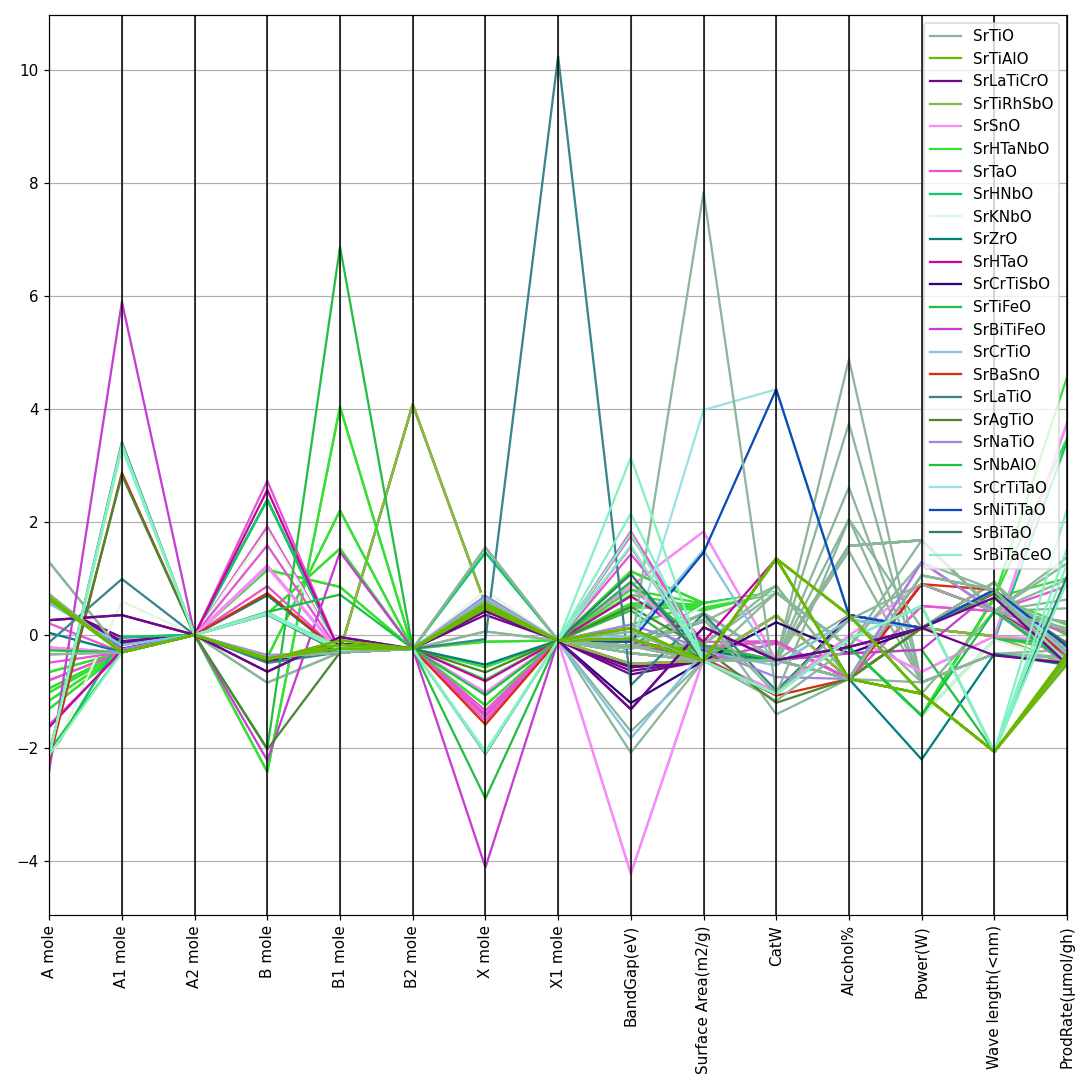

,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.381345,-0.446450,-0.779168,0.123642,-0.021696,-0.212706,SrTiO
1,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.347574,-0.446450,-0.779168,0.123642,-0.021696,-0.212706,SrTiO
2,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.296918,-0.446450,-0.779168,0.123642,-0.021696,-0.515658,SrTiO
3,0.695401,-0.306752,0.0,-0.395296,-0.308142,-0.244949,0.603080,-0.09759,-0.196447,-0.381345,-0.446450,-0.779168,0.123642,-0.021696,-0.510887,SrTiAlO
4,0.695401,-0.306752,0.0,-0.403072,-0.299444,-0.244949,0.580491,-0.09759,-0.196447,-0.229376,-0.446450,-0.779168,0.123642,-0.021696,-0.308124,SrTiAlO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,0.055515,-0.457330,1.351974,-0.779168,-1.040997,-2.069013,-0.445287,SrTiO
531,0.673706,-0.306752,0.0,-0.410847,-0.241453,-0.244949,0.557903,-0.09759,0.118505,-0.457330,1.351974,0.352591,-1.040997,-2.069013,-0.510887,SrTiAlO
532,0.673706,-0.306752,0.0,-0.410847,-0.241453,-0.244949,0.557903,-0.09759,0.118505,-0.457330,1.351974,-0.779168,-1.040997,-2.069013,-0.409506,SrTiAlO
533,0.623084,-0.306752,0.0,-0.441948,-0.096477,-0.244949,0.467547,-0.09759,0.118505,-0.457330,1.351974,0.352591,-1.040997,-2.069013,-0.370742,SrTiAlO


In [75]:
%matplotlib notebook
feature_lis = ["A mole", "A1 mole", "A2 mole", "B mole", "B1 mole", "B2 mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Label"]
df1 = df[df["A"] == "Sr"].loc[:,feature_lis].fillna(value = 0)
sc = StandardScaler()
df1.loc[:, :"ProdRate(μmol/gh)"] = sc.fit_transform(df1.loc[:, :"ProdRate(μmol/gh)"])
fig, ax = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
ax = pd.plotting.parallel_coordinates(df1,'Label')#, color=('#DE3163'))
ax.tick_params(axis = "x", rotation = 90)
df1

In [78]:
df4 = df1[df1["ProdRate(μmol/gh)"] > 2]
df4

,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
150,-0.656923,-0.306752,0.0,-2.424664,4.040171,-0.244949,0.557903,-0.09759,1.126352,0.564242,0.752499,-0.213289,-1.429210,0.660743,3.480767,SrHTaNbO
151,-0.946190,-0.306752,0.0,-0.403072,2.203808,-0.244949,-0.119764,-0.09759,1.126352,0.564242,0.752499,-0.213289,-1.429210,0.660743,4.564162,SrHTaNbO
241,-2.175575,-0.036463,0.0,2.396057,-0.309109,-0.244949,1.461458,-0.09759,-0.191408,0.525405,0.752499,-0.213289,-1.429210,-0.089940,3.421131,SrHNbO
326,-0.259181,-0.306752,0.0,1.206427,-0.309109,-0.244949,-1.045908,-0.09759,0.937381,-0.423559,-0.997967,-0.015231,-0.652784,-0.021696,3.759072,SrSnO
327,-0.259181,-0.306752,0.0,1.206427,-0.309109,-0.244949,-1.045908,-0.09759,-4.227833,-0.415116,-0.997967,-0.015231,-0.652784,-0.021696,3.759072,SrSnO
509,-2.117722,-0.306752,0.0,0.390015,-0.212458,-0.244949,-2.062407,-0.09759,3.142045,-0.457330,-1.045925,-0.071819,0.511855,-2.069013,2.232382,SrBiTaCeO


<IPython.core.display.Javascript object>


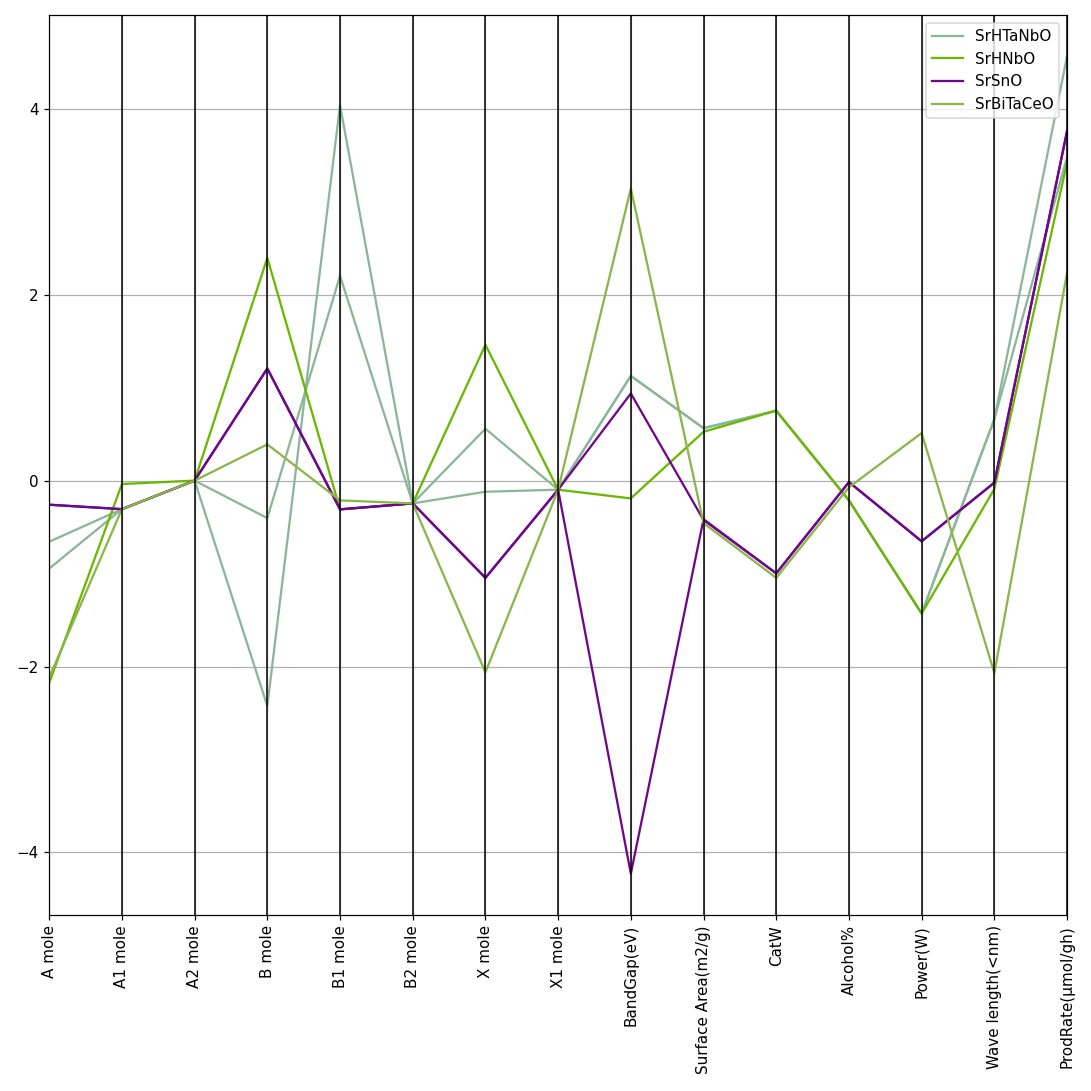

,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
0,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.381345,-0.446450,-0.779168,0.123642,-0.021696,-0.212706,SrTiO
1,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.347574,-0.446450,-0.779168,0.123642,-0.021696,-0.212706,SrTiO
2,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,-0.196447,-0.296918,-0.446450,-0.779168,0.123642,-0.021696,-0.515658,SrTiO
3,0.695401,-0.306752,0.0,-0.395296,-0.308142,-0.244949,0.603080,-0.09759,-0.196447,-0.381345,-0.446450,-0.779168,0.123642,-0.021696,-0.510887,SrTiAlO
4,0.695401,-0.306752,0.0,-0.403072,-0.299444,-0.244949,0.580491,-0.09759,-0.196447,-0.229376,-0.446450,-0.779168,0.123642,-0.021696,-0.308124,SrTiAlO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.702633,-0.306752,0.0,-0.395296,-0.309109,-0.244949,0.603080,-0.09759,0.055515,-0.457330,1.351974,-0.779168,-1.040997,-2.069013,-0.445287,SrTiO
531,0.673706,-0.306752,0.0,-0.410847,-0.241453,-0.244949,0.557903,-0.09759,0.118505,-0.457330,1.351974,0.352591,-1.040997,-2.069013,-0.510887,SrTiAlO
532,0.673706,-0.306752,0.0,-0.410847,-0.241453,-0.244949,0.557903,-0.09759,0.118505,-0.457330,1.351974,-0.779168,-1.040997,-2.069013,-0.409506,SrTiAlO
533,0.623084,-0.306752,0.0,-0.441948,-0.096477,-0.244949,0.467547,-0.09759,0.118505,-0.457330,1.351974,0.352591,-1.040997,-2.069013,-0.370742,SrTiAlO


In [79]:
fig, ax = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
ax = pd.plotting.parallel_coordinates(df4,'Label')#, color=('#DE3163'))
ax.tick_params(axis = "x", rotation = 90)
df1

,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label,Crystal,Prep Meth,A
0,1.078297,-0.344285,-0.210884,-0.813212,-0.350907,-0.106,0.142070,-0.099471,-0.173172,-0.376769,-0.170047,-0.71246,-0.172349,-0.363455,-0.199632,[S1]SrTi,cubic,flux,Sr
1,1.078297,-0.344285,-0.210884,-0.813212,-0.350907,-0.106,0.142070,-0.099471,-0.173172,-0.363417,-0.170047,-0.71246,-0.172349,-0.363455,-0.199632,[S1]SrTi,cubic,flux,Sr
2,1.078297,-0.344285,-0.210884,-0.813212,-0.350907,-0.106,0.142070,-0.099471,-0.173172,-0.343389,-0.170047,-0.71246,-0.172349,-0.363455,-0.339193,[S1]SrTi,cubic,flux,Sr
3,1.072911,-0.344285,-0.210884,-0.813212,-0.350002,-0.106,0.142070,-0.099471,-0.173172,-0.376769,-0.170047,-0.71246,-0.172349,-0.363455,-0.336995,[S1]SrTiAl,cubic,flux,Sr
4,1.072911,-0.344285,-0.210884,-0.818237,-0.341860,-0.106,0.136455,-0.099471,-0.173172,-0.316686,-0.170047,-0.71246,-0.172349,-0.363455,-0.243588,[S1]SrTiAl,cubic,flux,Sr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.344036,[S151]LaCo,rhombohedral,SSR,La
536,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.341734,[S151]LaCo,rhombohedral,SSR,La
537,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.338772,[S151]LaCo,rhombohedral,SSR,La
538,1.546866,-0.344285,-0.210884,-0.918745,-0.350907,-0.106,-0.234135,-0.099471,-2.406720,-0.406811,-0.170047,-0.71246,1.204201,-3.340337,-0.340088,[S151]LaCo,rhombohedral,SG,La


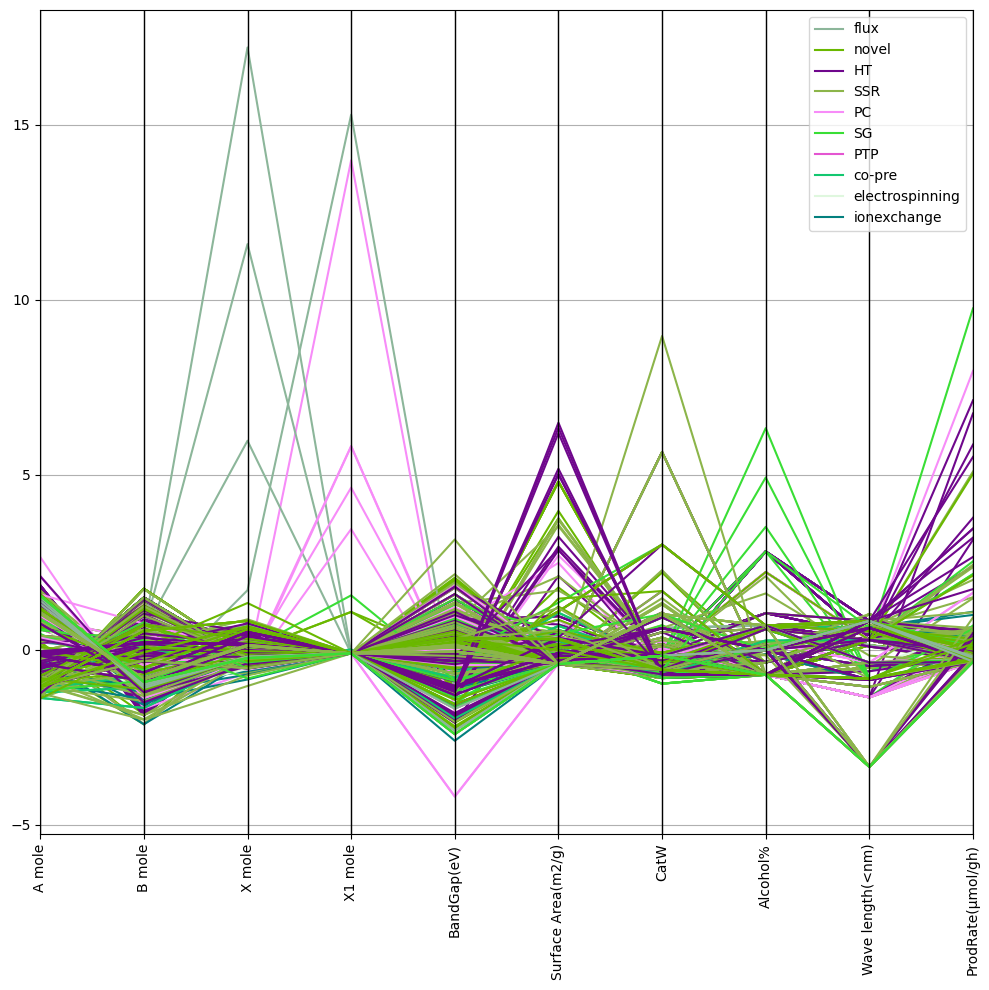

In [140]:
###### BandGapに対して変化する傾向をみたい
df
feature_lis2 = ["A mole", "A1 mole", "A2 mole", "B mole", "B1 mole", "B2 mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%", "Power(W)",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Label","Crystal","Prep Meth", "A"]
df1 = df.loc[:,feature_lis2]
sc = StandardScaler() 
df1 = df1.fillna(value = 0)
df1.loc[:,:"ProdRate(μmol/gh)"] = sc.fit_transform(df1.loc[:,:"ProdRate(μmol/gh)"])

df2 = df1.loc[:,["A mole", "B mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Prep Meth"]]
fig, ax = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
ax = pd.plotting.parallel_coordinates(df2,"Prep Meth")#, color=('#DE3163'))
ax.tick_params(axis = "x", rotation = 90)
df1

,A mole,B mole,X mole,X1 mole,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Wave length(<nm),ProdRate(μmol/gh),Crystal
180,-2.061553,2.061553,-2.061553,0.0,1.858587,-0.044882,0.084370,-1.788854,-2.061553,-0.448376,orthorombic
181,-2.061553,2.061553,-2.061553,0.0,1.858587,-0.044882,0.084370,-1.788854,-2.061553,-0.414560,orthorombic
182,-2.061553,2.061553,-2.061553,0.0,1.858587,-0.044882,0.084370,-1.788854,-2.061553,-0.346928,orthorombic
183,-2.061553,2.061553,-2.061553,0.0,1.858587,-0.044882,0.084370,-1.788854,-2.061553,-0.404362,orthorombic
357,0.485071,-0.485071,0.485071,0.0,-0.317090,-0.267233,-0.297479,0.559017,0.485071,-0.151009,cubic
358,0.485071,-0.485071,0.485071,0.0,-0.317090,-0.267233,-0.297479,0.559017,0.485071,-0.097333,cubic
359,0.485071,-0.485071,0.485071,0.0,-0.317090,-0.267233,-0.297479,0.559017,0.485071,0.525312,cubic
360,0.485071,-0.485071,0.485071,0.0,-0.317090,-0.267233,-0.297479,0.559017,0.485071,0.364283,cubic
361,0.485071,-0.485071,0.485071,0.0,-0.317090,-0.267233,-0.297479,0.559017,0.485071,0.042225,cubic
362,0.485071,-0.485071,0.485071,0.0,-0.317090,-0.267233,-0.297479,0.559017,0.485071,-0.204686,cubic


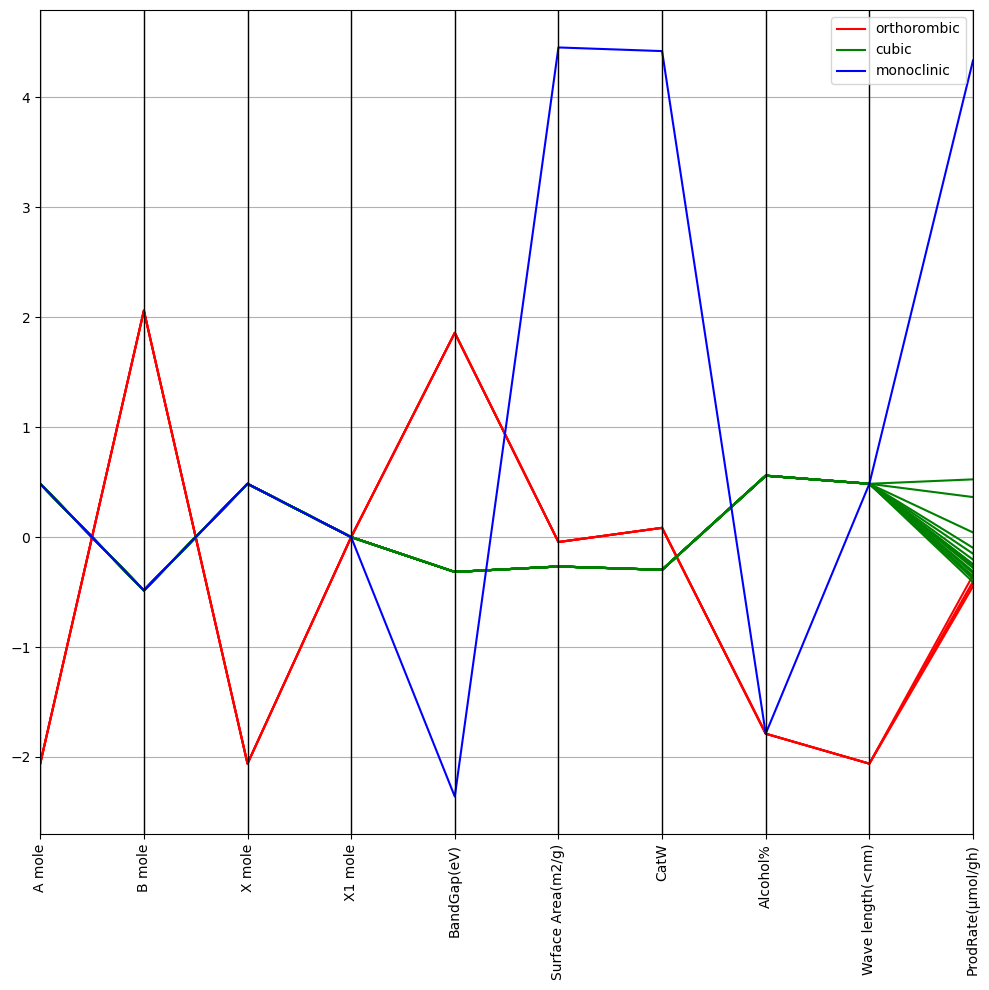

In [12]:
####### 'NaNbO'のparallel
df2 = df[df["Label2"] == 'NaTaONiO'].loc[:,["A mole", "B mole", "X mole", "X1 mole",
              "BandGap(eV)", "Surface Area(m2/g)", "CatW", "Alcohol%",
               "Wave length(<nm)", "ProdRate(μmol/gh)","Crystal"]]
sc = StandardScaler() 
df2 = df2.fillna(value = 0)
df2.loc[:,:"ProdRate(μmol/gh)"] = sc.fit_transform(df2.loc[:,:"ProdRate(μmol/gh)"])
fig, ax = plt.subplots(1,1, figsize = (10,10), dpi = 100, tight_layout = True)
ax = pd.plotting.parallel_coordinates(df2[df2["Crystal"] != 0],"Crystal",color = ["r","g","b"])#, color=('#DE3163'))
ax.tick_params(axis = "x", rotation = 90)
df2

In [9]:
df[df["Label"] == 'NaNbO']

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label
267,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,SG,1173.0,10.0,PD,Pt,0.50,orthorombic,3.40,1.70,0.27,13.5,NaN,NaN,Hg,400.0,365.0,9133.33,NaNbO
268,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,SG,NaN,NaN,PD,Pt,0.50,orthorombic,3.40,2.00,0.27,13.5,NaN,NaN,Hg,400.0,365.0,9150.00,NaNbO
269,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,SG,873.0,1.0,PD,Pt,0.50,orthorombic,3.30,37.80,0.27,13.5,NaN,NaN,Hg,400.0,365.0,10466.00,NaNbO
270,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,SSR,1173.0,5.0,PD,Pt,0.50,orthorombic,3.35,4.40,0.27,13.5,NaN,NaN,Hg,400.0,365.0,10116.00,NaNbO
271,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,HT,1173.0,10.0,PD,RuO2,1.25,orthorombic,3.40,1.70,0.27,0.0,NaN,NaN,Hg,400.0,365.0,102.00,NaNbO
272,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,PC,NaN,NaN,PD,RuO2,1.25,orthorombic,3.40,2.00,0.27,0.0,NaN,NaN,Hg,400.0,365.0,82.83,NaNbO
273,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,PC,873.0,1.0,PD,RuO2,1.25,orthorombic,3.30,37.80,0.27,0.0,NaN,NaN,Hg,400.0,365.0,335.00,NaNbO
274,[S49],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.570,NaN,NaN,0.290,NaN,SSR,1173.0,5.0,PD,RuO2,1.25,orthorombic,3.35,4.40,0.27,0.0,NaN,NaN,Hg,400.0,365.0,78.00,NaNbO
337,[S67],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.567,NaN,NaN,0.293,NaN,SSR,773.0,12.0,PD,Pt,0.80,NaN,3.20,12.50,0.81,18.5,NaN,NaN,Xe,300.0,300.0,12.30,NaNbO
343,[S67],Na,non,non,Nb,non,non,O,non,0.14,NaN,NaN,0.567,NaN,NaN,0.293,NaN,co-pre,773.0,12.0,PD,Pt,0.80,NaN,3.20,12.50,0.81,18.5,NaN,NaN,Xe,300.0,420.0,0.30,NaNbO
